In [2]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set()  
import io
from google.colab import files
plt.style.use("seaborn")
upload = files.upload()

Saving Brent oil with return.csv to Brent oil with return.csv


In [3]:
df = pd.read_csv("Brent oil with return.csv")

In [4]:
df

,Unnamed: 0,date,price_t,price_t-1,returns
0,1,1987/5/21,18.45,18.63,-0.009662
1,2,1987/5/22,18.55,18.45,0.005420
2,3,1987/5/25,18.60,18.55,0.002695
3,4,1987/5/26,18.63,18.60,0.001613
4,5,1987/5/27,18.60,18.63,-0.001610
...,...,...,...,...,...
8979,8980,2022/10/5,94.35,93.74,0.006507
8980,8981,2022/10/6,95.65,94.35,0.013778
8981,8982,2022/10/7,98.88,95.65,0.033769
8982,8983,2022/10/10,97.13,98.88,-0.017698


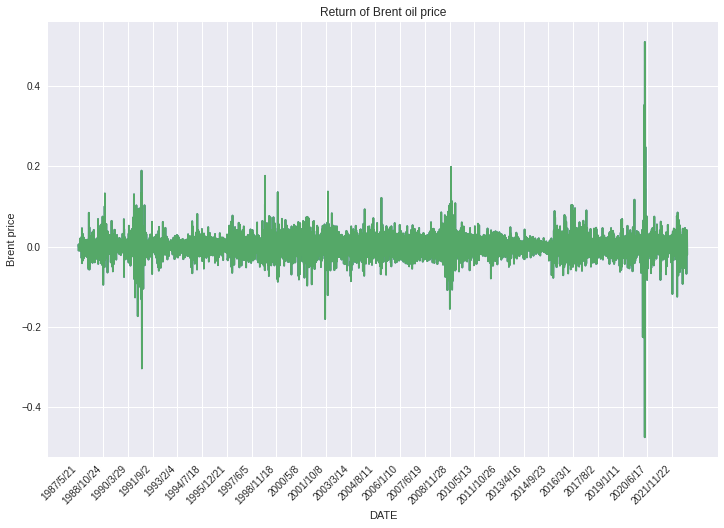

In [5]:
df['returns'].plot(figsize=(12, 8))
plt.title('Return of Brent oil price')
plt.plot(df["returns"])
plt.xticks(df.index[::365], df['date'][::365], rotation=45, ha='right', fontsize=10)
plt.xlabel('DATE')
plt.ylabel('Brent price')
plt.show()

In [24]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import pandas as pd
import io
from google.colab import files

import warnings

warnings.filterwarnings('ignore')

In [25]:
#create new database with only required coloumns
data=df.filter(['returns'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 75 percent
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

6738

In [26]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.739975532805232e-17
Standard deviation of processed data:  1.0


In [51]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(5,len(train_data)):
  x_train.append(train_data[i-5:i])
  y_train.append(train_data[i])

In [52]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(6733, 5, 1)

In [53]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
#np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (6733, 5, 1)
x_train shape after reshaping (6733, 5, 1)


In [54]:
#build LSTM model
model= Sequential()
model.add(LSTM(1000,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(1000,return_sequences=False))
model.add(Dense(500))
model.add(Dense(250))
model.add(Dense(1)) 

In [55]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 1000)           4008000   
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
 dense_8 (Dense)             (None, 1)                 251       
                                                                 
Total params: 12,638,001
Trainable params: 12,638,001
Non-trainable params: 0
_________________________________________________________________


In [33]:
print(len(x_train))
print(x_train.shape)

6733
(6733, 5, 1)


In [57]:
#train the model
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
211/211 [==============================] - 7s 13ms/step - loss: 0.8238
Epoch 2/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8205
Epoch 3/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8201
Epoch 4/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8194
Epoch 5/10
211/211 [==============================] - 3s 12ms/step - loss: 0.8191
Epoch 6/10
211/211 [==============================] - 3s 13ms/step - loss: 0.8194
Epoch 7/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8193
Epoch 8/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8193
Epoch 9/10
211/211 [==============================] - 2s 12ms/step - loss: 0.8208
Epoch 10/10
211/211 [==============================] - 3s 12ms/step - loss: 0.8191


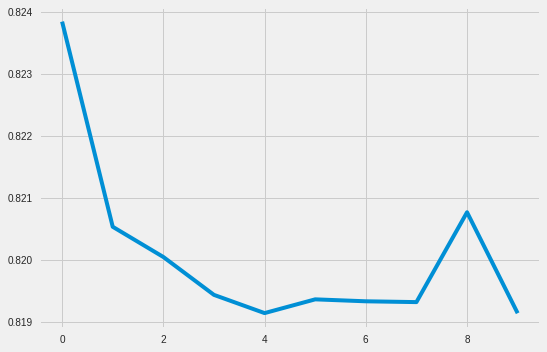

In [58]:
plt.plot(history.history['loss'])

In [60]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-5:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(5,len(test_data)):
  x_test.append(test_data[i-5:i, 0])

In [61]:
#convert the data to numpy 
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

71/71 [==============================] - 1s 5ms/step
[[0.00063921]
 [0.00063889]
 [0.00063848]
 ...
 [0.00063609]
 [0.00063568]
 [0.00063462]]


In [64]:
from sklearn.metrics import r2_score
r2_score(predictions,y_test)

-154856193.1601762

In [65]:
import datetime
# Get the number of predicted samples
num_predictions = predictions.shape[0]

# Get the current time
now = datetime.datetime.now()

time = [] 

# Iterate over the predictions and timestamps, and print the prediction and timestamp
for i in range(num_predictions):
  # Calculate the prediction timestamp by adding the number of days to the current time
  prediction_timestamp = now + datetime.timedelta(days=i)
  print("Prediction:", predictions[i], "Timestamp:", prediction_timestamp)
  time. append (str(prediction_timestamp))

Prediction: [0.00063921] Timestamp: 2023-02-13 13:48:29.815832
Prediction: [0.00063889] Timestamp: 2023-02-14 13:48:29.815832
Prediction: [0.00063848] Timestamp: 2023-02-15 13:48:29.815832
Prediction: [0.00063875] Timestamp: 2023-02-16 13:48:29.815832
Prediction: [0.0006376] Timestamp: 2023-02-17 13:48:29.815832
Prediction: [0.00063776] Timestamp: 2023-02-18 13:48:29.815832
Prediction: [0.00063795] Timestamp: 2023-02-19 13:48:29.815832
Prediction: [0.00063736] Timestamp: 2023-02-20 13:48:29.815832
Prediction: [0.00063746] Timestamp: 2023-02-21 13:48:29.815832
Prediction: [0.00063647] Timestamp: 2023-02-22 13:48:29.815832
Prediction: [0.00063684] Timestamp: 2023-02-23 13:48:29.815832
Prediction: [0.00063748] Timestamp: 2023-02-24 13:48:29.815832
Prediction: [0.00063758] Timestamp: 2023-02-25 13:48:29.815832
Prediction: [0.00063753] Timestamp: 2023-02-26 13:48:29.815832
Prediction: [0.00063765] Timestamp: 2023-02-27 13:48:29.815832
Prediction: [0.0006382] Timestamp: 2023-02-28 13:48:29.8

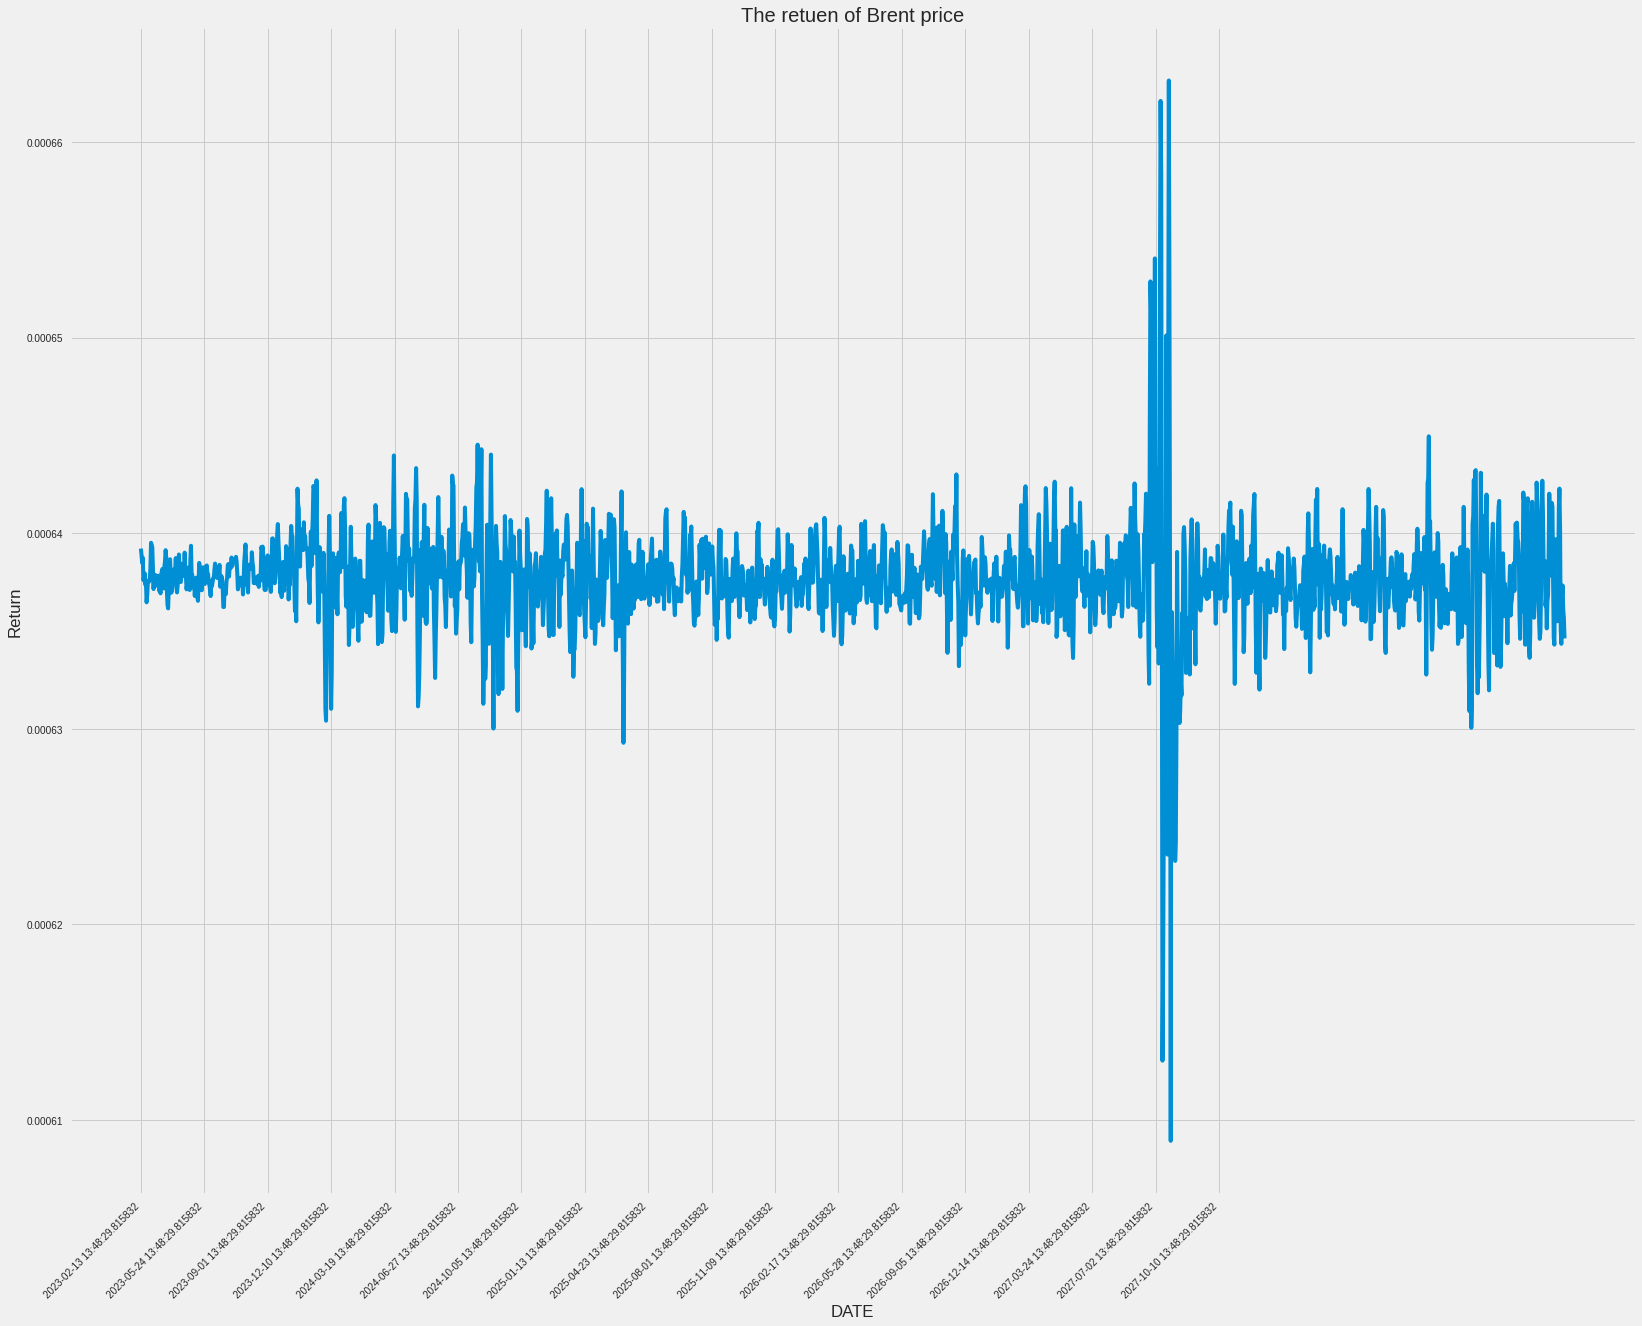

In [66]:
#visualize the Brent prices
plt.figure(figsize=(25,20))
plt.title('The retuen of Brent price')
plt.plot(predictions)
plt.xticks(pd.RangeIndex(0,1797,100), time[::100], rotation=45, ha='right', fontsize=10)
plt.xlabel('DATE')
plt.ylabel('Return')
plt.show()